In [2]:
import pandas as pd

In [4]:
train = pd.read_csv('./data/train.csv', header=0, sep=',', quotechar='"', index_col='Id')
test = pd.read_csv('./data/test.csv', header=0, sep=',', quotechar='"', index_col='Id')

# define the data
train_data = train.drop('Cover_Type', axis=1)
test_data = test

# define the labels
train_labels = train['Cover_Type']

# Random Forest Classifier

https://www.datacamp.com/community/tutorials/random-forests-classifier-python


In [6]:
# random forest classifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, bootstrap=True, oob_score=True)
rfc.fit(train_data, train_labels)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [10]:
# listing important features
feature_imp = pd.Series(rfc.feature_importances_, index=train_data.columns).sort_values(ascending=False)
feature_imp

Elevation                             0.226914
Horizontal_Distance_To_Roadways       0.094793
Horizontal_Distance_To_Fire_Points    0.071636
Horizontal_Distance_To_Hydrology      0.061046
Vertical_Distance_To_Hydrology        0.054458
Hillshade_9am                         0.054177
Aspect                                0.049118
Hillshade_3pm                         0.046211
Wilderness_Area4                      0.045883
Hillshade_Noon                        0.043522
Slope                                 0.036457
Soil_Type10                           0.022685
Wilderness_Area3                      0.018930
Soil_Type38                           0.017460
Soil_Type39                           0.017179
Wilderness_Area1                      0.016651
Soil_Type3                            0.016409
Soil_Type4                            0.012426
Soil_Type40                           0.010148
Soil_Type30                           0.009357
Soil_Type13                           0.006633
Soil_Type17  

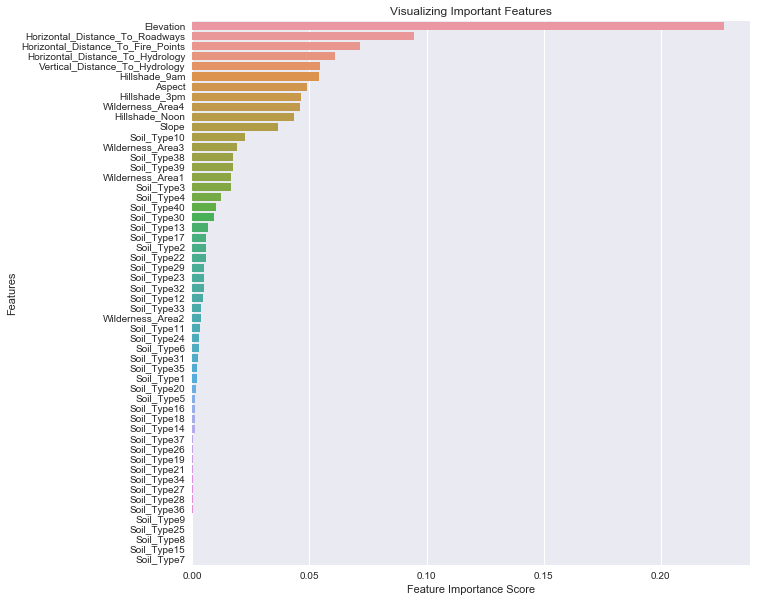

In [36]:
# plot important features

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x=feature_imp, y=feature_imp.index, ax=ax)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()
